In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starry

starry.config.lazy = False
starry.config.quiet = True

In [2]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [3]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)

In [5]:
radius = 15
theta = np.multiply(meanPhase, 360)

best_phase = 45.3
best_contrast = 0.252
best_radius = 15.0
guess_lat = np.linspace(-90, 90, 181, endpoint=True)

min_chi = 10000

In [6]:
chi = []

for lat in guess_lat:
        
    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=best_radius, lat=lat, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median
    
    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_lat = lat

best_lat

45.0

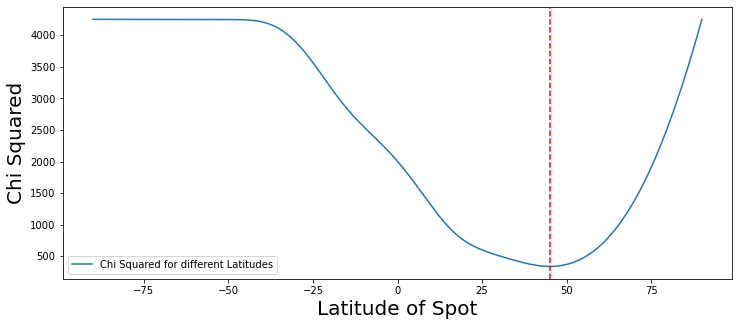

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(guess_lat, chi, label='Chi Squared for different Latitudes')
plt.xlabel("Latitude of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_lat, color='r', linestyle='--');

In [12]:
guess_lat = np.linspace(45-0.5, 45+0.5, 11, endpoint=True)

min_chi = 10000

In [13]:
chi = []

for lat in guess_lat:
        
    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=best_radius, lat=lat, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median
    
    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_lat = lat


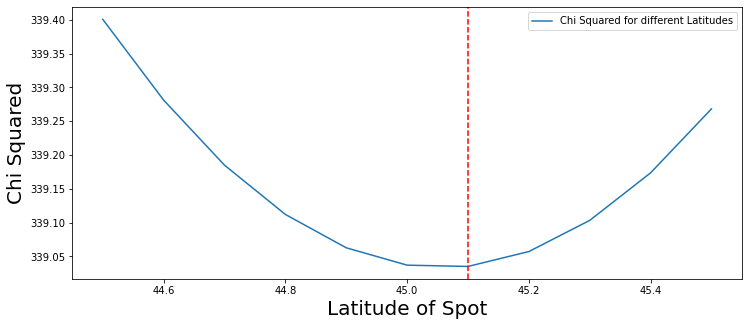

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(guess_lat, chi, label='Chi Squared for different Latitudes')
plt.xlabel("Latitude of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_lat, color='r', linestyle='--');

In [15]:
chi[5:7]

[339.0369890717014, 339.03509235234947]

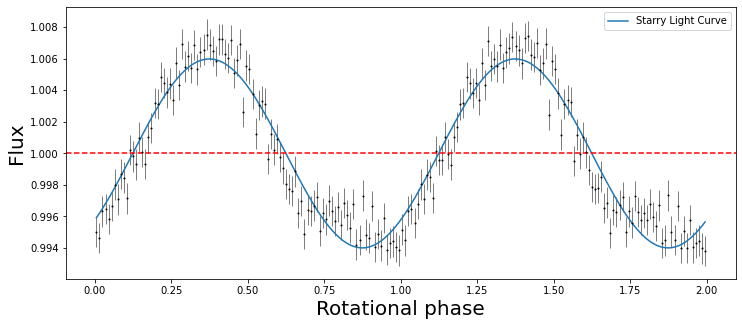

In [17]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=best_radius, lat=best_lat, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

In [18]:
best_lat

45.1

In [19]:
min_chi

339.03509235234947